# Árboles de Regresión

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../../datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

In [4]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)

In [7]:
regtree.fit(X, Y)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=30, random_state=0)

In [8]:
preds = regtree.predict(data[predictors])

In [9]:
data["preds"] = preds

In [10]:
data[["preds", "medv"]]

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,22.840000,22.4
502,20.624138,20.6
503,28.978261,23.9
504,31.170000,22.0


In [16]:
from sklearn.tree import export_graphviz

In [17]:
with open("resources/boston_dtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [18]:
import os
from graphviz import Source

In [19]:
file = open("resources/boston_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="rm <= 6.941\\nsquared_error = 84.42\\nsamples = 506\\nvalue = 22.533"] ;\n1 [label="lstat <= 14.4\\nsquared_error = 40.273\\nsamples = 430\\nvalue = 19.934"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="lstat <= 4.91\\nsquared_error = 26.009\\nsamples = 255\\nvalue = 23.35"] ;\n1 -> 2 ;\n3 [label="squared_error = 47.187\\nsamples = 20\\nvalue = 31.565"] ;\n2 -> 3 ;\n4 [label="lstat <= 9.715\\nsquared_error = 17.974\\nsamples = 235\\nvalue = 22.651"] ;\n2 -> 4 ;\n5 [label="age <= 87.6\\nsquared_error = 22.287\\nsamples = 122\\nvalue = 24.393"] ;\n4 -> 5 ;\n6 [label="rm <= 6.125\\nsquared_error = 11.111\\nsamples = 112\\nvalue = 23.787"] ;\n5 -> 6 ;\n7 [label="squared_error = 4.865\\nsamples = 29\\nvalue = 20.624"] ;\n6 -> 7 ;\n8 [label="rm <= 6.611\\nsquared_error = 8.576\\nsamples = 83\\nvalue = 24.893"] ;\n6 -> 8 ;\n9 [label="tax <= 332.5\\nsquared_error =

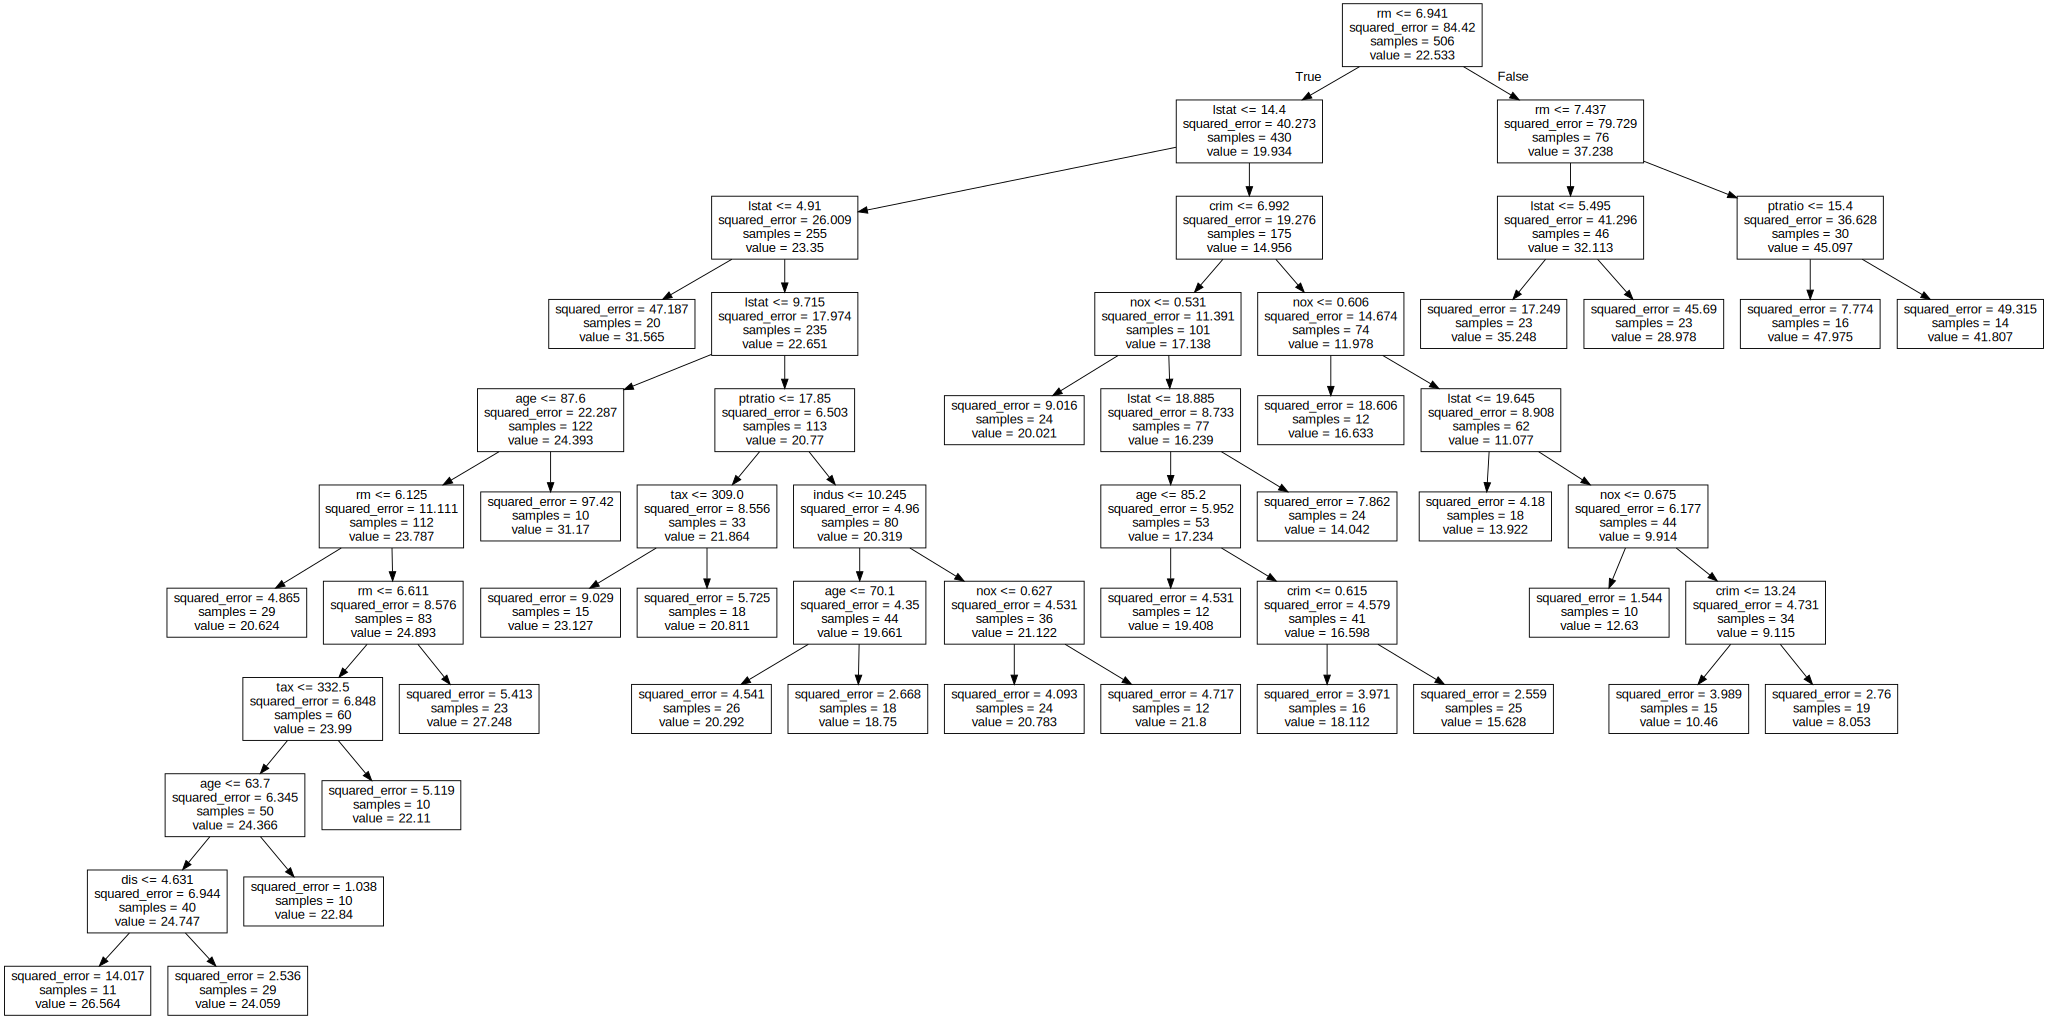

In [20]:
Source(text)